## DETECCIÓN DE OUTLIERS

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

Aquí se está importando la clase EllipticEnvelope de la sub-biblioteca covariance de scikit-learn. Esta clase es utilizada para modelar la distribución de los datos como una elipse y detectar outliers que se encuentran fuera de la elipse.

In [3]:
# Carga de datos.
df = pd.read_csv("outliers.csv")
df

,a,b
0,0.149014,-0.041479
1,0.194307,0.456909
2,-0.070246,-0.070241
3,0.473764,0.230230
4,-0.140842,0.162768
...,...,...
195,-5.114441,0.646251
196,5.631630,0.277174
197,1.552784,2.348984
198,-0.545507,1.530697


Dataset sencillo con solo 2 atributos, que sería A y B

### 1) EllipticEnvelope()

Mayor información:
https://scikit-learn.org/0.15/modules/generated/sklearn.covariance.EllipticEnvelope.html

Parámetros importantes EllipticEnvelope:

support_fraction=None: Este parámetro controla la proporción de los datos que se utilizan para calcular la "elipse" central de los datos. Al dejarlo como None, el algoritmo determinará automáticamente la mejor fracción de soporte basada en los datos.

contamination=0.25: Este parámetro define la proporción de outliers esperados en los datos. En este caso, se espera que el 25% de los datos sean outliers. Es importante especificar este valor porque afecta cómo se ajusta la elipse: cuanto mayor es el valor, más datos serán considerados como outliers.

random_state=42: Este parámetro fija una semilla para el generador de números aleatorios. Es útil para asegurar que los resultados sean reproducibles. Al utilizar random_state=42, obtendrás los mismos resultados cada vez que ejecutes el código, lo que facilita la comparación y validación de resultados.

In [3]:
# Entrenamos un objeto de tipo EllipticEnvelope

#Se crea un objeto de la clase EllipticEnvelope. Se configuran varios parámetros
algorithm = EllipticEnvelope(support_fraction=None, contamination=0.25, random_state=42)

outlier_method = algorithm.fit(df) #Trabajamos sobre toda la matriz completa. Y entrenamos el algoritmo con el dataframe

# Aplicamos el método de detección de outliers entrenado con los parámetros dados sobre nuesto dataset
df_outliers = outlier_method.predict(df) #Realizó la predicción sobre el dataframe. 1 dato normal. -1 dato anómalo
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0]
print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]

Outliers en la posición: 
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]

Número de outliers: 
 50


In [4]:
#Función detección aoutlier diferentes algoritmos
# Definimos una función que, dado un determinado "df" y un "algorithm", devuelva la matriz y la posición de outliers
def find_outliers(df, algorithm):
    
    #???

    return df_outliers, pos_outliers

### Gráficamente

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def grafico_outliers(df, outlier_method, n_outliers, threshold, x_min, x_max):
    """
    Grafica los datos y los outliers detectados.

    Parámetros:
    - df: DataFrame con los datos a analizar.
    - outlier_method: Objeto del modelo entrenado de detección de outliers (EllipticEnvelope).
    - n_outliers: Número aproximado de outliers a mostrar en la gráfica.
    - threshold: Umbral para determinar si una observación es un outlier.
    - x_min, x_max: Valores para establecer los límites del eje X en la gráfica.
    """
    # Obtener los valores de la función de decisión
    scores_pred = outlier_method.decision_function(df)
    
    # Identificar los outliers
    outliers = df[scores_pred <= threshold]
    
    # Crear una figura y un set de ejes
    plt.figure(figsize=(10, 6))
    
    # Dibujar los puntos de datos
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color='blue', label='Datos', alpha=0.5)
    
    # Dibujar los outliers
    plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], color='red', label='Outliers', alpha=0.7)
    
    # Dibujar la frontera de la elipse
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(x_min, x_max, 500))
    zz = outlier_method.decision_function(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    
    plt.contour(xx, yy, zz, levels=[threshold], linewidths=2, colors='green')
    
    # Títulos y etiquetas
    plt.title('Detección de Outliers usando EllipticEnvelope')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    
    # Mostrar la gráfica
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


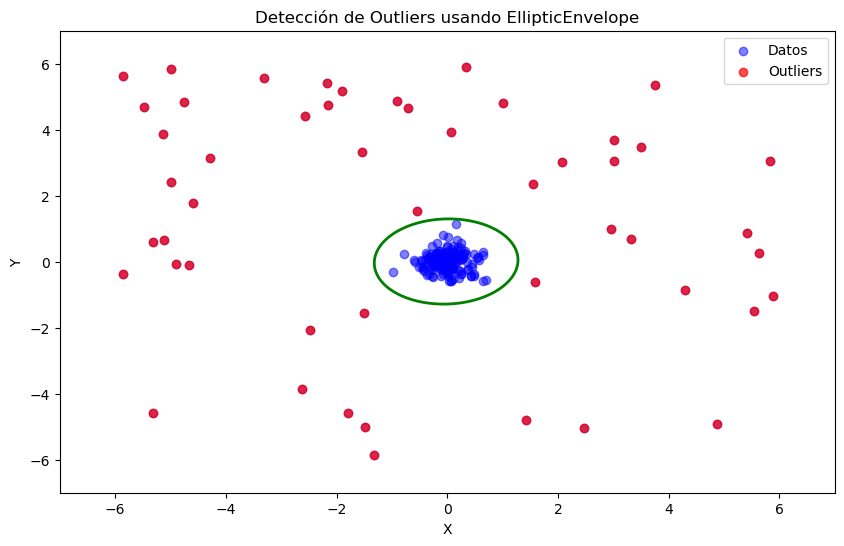

In [6]:
# Limpieza de datos: detección de outliers.
outlier_method = EllipticEnvelope().fit(df)
scores_pred = outlier_method.decision_function(df)
threshold = stats.scoreatpercentile(scores_pred, 25)

# Dibujar gráfica de outliers.
grafico_outliers(df, outlier_method, 150, threshold, -7, 7)
# df es el DataFrame con los datos a analizar
# outlier_method es el modelo EllipticEnvelope entrenado
# n_outliers es un número aproximado de outliers a visualizar
# threshold es el umbral calculado para la función de decisión
# x_min, x_max son los límites para los ejes de la gráfica

### 2) Box plot

Para un sólo atributo (No toda la matriz)

limite inferior:  -1.0853060827395105
limite superior:  1.0119554520872196
Posición de outliers:  [150 153 154 157 159 160 162 165 168 169 171 172 174 175 177 178 181 184
 185 186 187 190 191 192 193 195 151 152 155 156 161 163 164 166 167 173
 176 179 180 182 188 189 196 197]
Número de outliers:  44


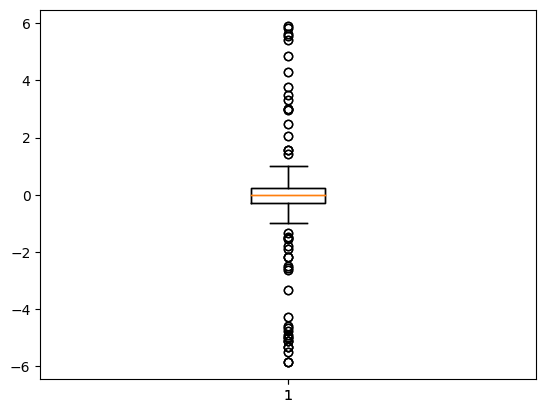

In [7]:
# Seleccionamos el atributo que vamos a medir
a = df['a']

# Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
Q1 = stats.scoreatpercentile(a, 25)
Q3 = stats.scoreatpercentile(a, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

# Observamos los límites inferior y superior
print('limite inferior: ', li)
print('limite superior: ', ls)

# Buscamos la posición de los outliers
pos_i = np.where(a<li)[0]
pos_s = np.where(a>ls)[0]
pos_outliers = np.concatenate((pos_i, pos_s))
print('Posición de outliers: ', pos_outliers)
print('Número de outliers: ', len(pos_outliers))

# Dibujamos el diagrama de caja y bigotes
prop = plt.boxplot(a)
plt.boxplot(a)
plt.show()

In [14]:
# Definir una función que, dada una columna de un dataframe, devuelva la posición de los outliers según el método box plot
def find_limits_BP(variable):
    
    #???
    
    return pos_outliers


### Outliers para cada atributo

limite inferior:  -1.0853060827395105
limite superior:  1.0119554520872196
Posición de outliers:  [150 153 154 157 159 160 162 165 168 169 171 172 174 175 177 178 181 184
 185 186 187 190 191 192 193 195 151 152 155 156 161 163 164 166 167 173
 176 179 180 182 188 189 196 197]
Número de outliers:  44


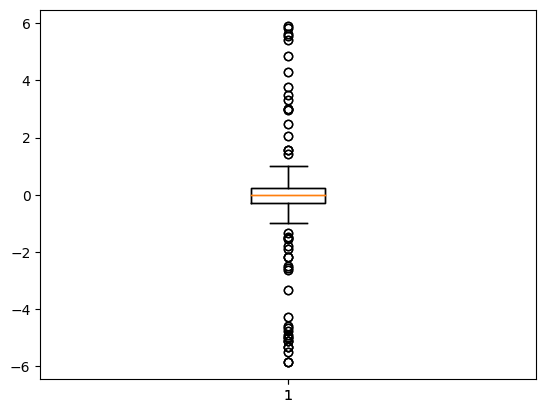

limite inferior:  -1.0853060827395105
limite superior:  1.0119554520872196
Posición de outliers:  [150 153 154 157 159 160 162 165 168 169 171 172 174 175 177 178 181 184
 185 186 187 190 191 192 193 195 151 152 155 156 161 163 164 166 167 173
 176 179 180 182 188 189 196 197]
Número de outliers:  44


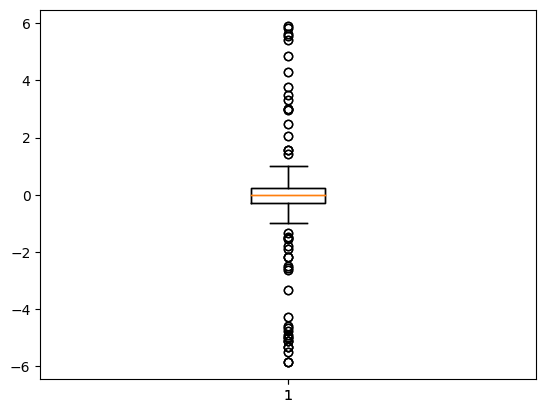

In [15]:
# Creamos un bucle for que estime los valores outliers de cada atributo
headers = df.columns # nombre de los atributos del CSV
pos_outliers = []
for i in range(len(headers)): #primera iteración i=a. Segunda iteración i=b
    variable = #??? # Atributo i. Cabecera de a, luego de b
    pos_out = #??? # Buscamos los outliers en esa variable con la función que hemos creado
    pos_out = np.expand_dims(pos_out, axis=1) # Extpandimos las dimensiones
    pos_outliers.append(pos_out) # Lo añadimos en una lista

Aquí se detectó dos cajas de bigotes, una para el atributo A y otra para el atributo B.

Unir los outliers de toda la matriz:

In [16]:
# Concatenamos todas las posiciones de outliers
po = np.vstack(pos_outliers)

# Vemos las posiciones de todos los outliers
pos_out = np.unique(po) #Los repetidos solo se detectan una vez
print('Posiciones de outliers totales: ', pos_out)

# Observamos el número de outliers
print('Numero de outliers totales: ', len(pos_out))

Posiciones de outliers totales:  [150 151 152 153 154 155 156 157 159 160 161 162 163 164 165 166 167 168
 169 171 172 173 174 175 176 177 178 179 180 181 182 184 185 186 187 188
 189 190 191 192 193 195 196 197]
Numero de outliers totales:  44


### 3) Otros métodos similares

Descripción del Algoritmo IsolationForest
IsolationForest es un algoritmo diseñado específicamente para la detección de outliers. A diferencia de otros métodos que modelan la distribución de los datos normales y luego identifican las desviaciones, IsolationForest se basa en la idea de "aislamiento". El concepto clave es que los outliers son más fáciles de aislar que los puntos normales, ya que tienden a ser escasos y se encuentran lejos de otros puntos de datos.

Parámetros del IsolationForest
n_estimators=100:

Este parámetro define el número de árboles que se utilizan en el bosque de aislamiento. En este caso, se están utilizando 100 árboles.
Un mayor número de estimadores (árboles) generalmente mejora la robustez del modelo, aunque también aumenta el costo computacional.
max_samples='auto':

Este parámetro controla el número máximo de muestras que se utilizarán para entrenar cada árbol del bosque.
Cuando se establece en 'auto', el valor predeterminado es min(256, n_samples), lo que significa que cada árbol se entrenará con un máximo de 256 muestras o con el número total de muestras si este es menor a 256. Esto es un valor eficiente que equilibra el rendimiento y la precisión.
contamination='auto':

Este parámetro especifica la proporción de outliers esperados en los datos. Es un valor que indica qué fracción de los datos debería considerarse como atípica.
Al establecerse en 'auto', el algoritmo estima esta proporción automáticamente según los datos de entrada. Esta es una opción útil cuando no se tiene una idea clara de cuántos outliers esperar en los datos.

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

IF = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto') #Aislando muestras por repetición.
# OC_SVM = ???
# LOF = ???


#Función detección aoutlier diferentes algoritmos
df_outliers, pos_outliers = find_outliers(df, IF) #Llamamos la función que creamos arriba.
print(len(pos_outliers))


Outliers en la posición: 
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 199]

Número de outliers: 
 49
49


### Para eliminación de outliers

In [ ]:
# Eliminamos los outliers
new_df = df[df_outliers==1]
print(new_df)